In [7]:
from icevision.all import *

In [8]:
BASE_DIR = "D:/ws/dldata/data/helmet/coco/coco/"

In [9]:
# Create the parser
train_parser = parsers.COCOBBoxParser(annotations_filepath=BASE_DIR+"annotations.json", img_dir=BASE_DIR+"/images")

In [10]:
data_splitter = RandomSplitter([0.8, 0.2])

In [11]:
train_records, valid_records = train_parser.parse(data_splitter)


  0%|          | 0/153 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/107 [00:00<?, ?it/s]

In [12]:
train_parser.class_map

<ClassMap: {'background': 0, 'Helmet': 1, 'Head': 2}>

In [13]:
image_size = 384
train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=image_size, presize=512), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])

In [14]:
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

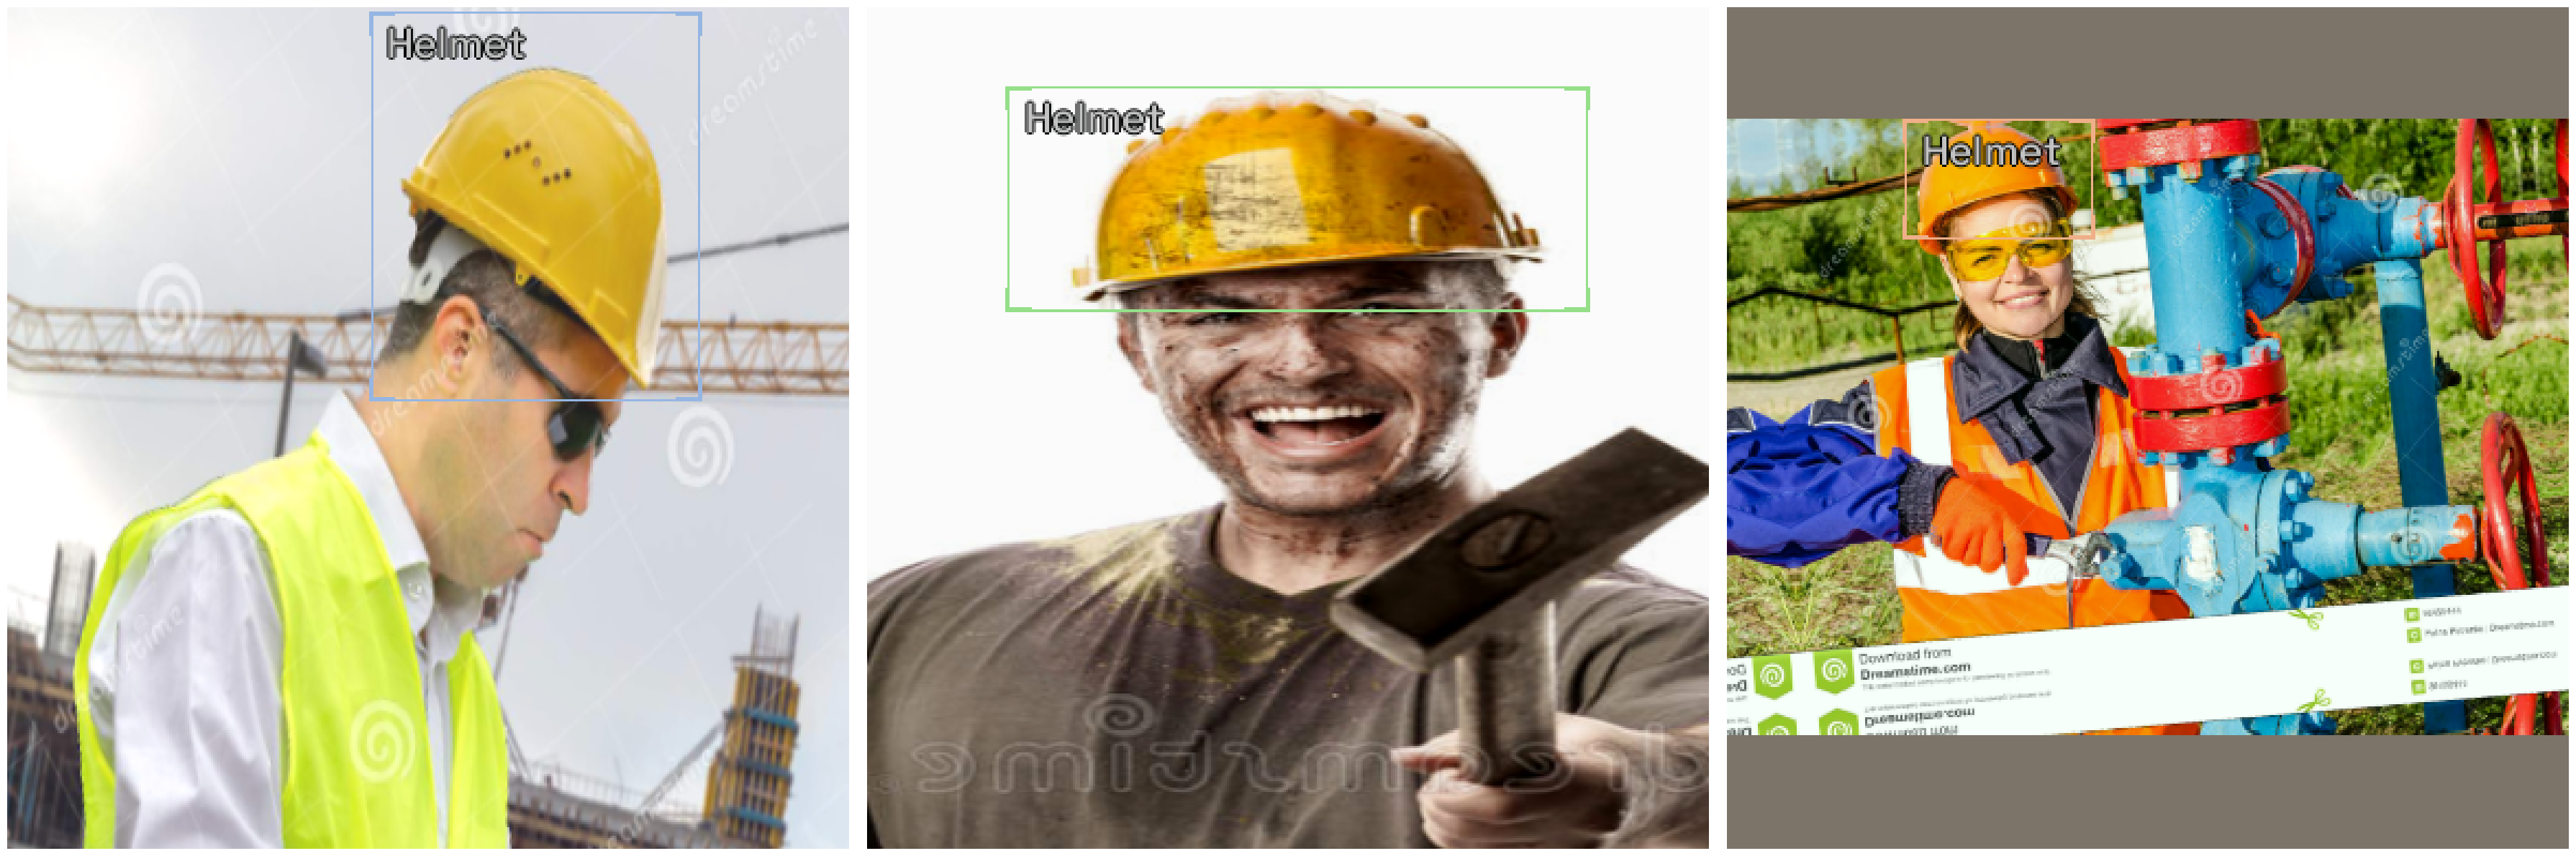

In [16]:
samples = [train_ds[i] for i in range(3)]
show_samples(samples, ncols=3)

In [17]:
model_type = models.mmdet.retinanet
backbone = model_type.backbones.resnet50_fpn_1x

In [18]:
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(train_parser.class_map)) 

2022-03-07 20:10:17,765 - mmcv - INFO - initialize ResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}
2022-03-07 20:10:17,765 - mmcv - INFO - load model from: torchvision://resnet50
2022-03-07 20:10:17,766 - mmcv - INFO - load checkpoint from torchvision path: torchvision://resnet50
2022-03-07 20:10:17,987 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2022-03-07 20:10:18,021 - mmcv - INFO - initialize FPN with init_cfg {'type': 'Xavier', 'layer': 'Conv2d', 'distribution': 'uniform'}
2022-03-07 20:10:18,080 - mmcv - INFO - initialize RetinaHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01, 'override': {'type': 'Normal', 'name': 'retina_cls', 'std': 0.01, 'bias_prob': 0.01}}
2022-03-07 20:10:18,119 - mmcv - INFO - 
backbone.conv1.weight - torch.Size([64, 3, 7, 7]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:10:18,119 - mmcv - INFO

2022-03-07 20:10:18,156 - mmcv - INFO - 
backbone.layer2.1.bn2.bias - torch.Size([128]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:10:18,157 - mmcv - INFO - 
backbone.layer2.1.conv3.weight - torch.Size([512, 128, 1, 1]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:10:18,158 - mmcv - INFO - 
backbone.layer2.1.bn3.weight - torch.Size([512]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:10:18,158 - mmcv - INFO - 
backbone.layer2.1.bn3.bias - torch.Size([512]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:10:18,159 - mmcv - INFO - 
backbone.layer2.2.conv1.weight - torch.Size([128, 512, 1, 1]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:10:18,160 - mmcv - INFO - 
backbone.layer2.2.bn1.weight - torch.Size([128]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:10:18,160 - mmcv - INFO - 
backbone.layer2.2.bn1.bias - torch.Size([128]): 
PretrainedInit: load fro

2022-03-07 20:10:18,204 - mmcv - INFO - 
backbone.layer3.3.bn2.weight - torch.Size([256]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:10:18,205 - mmcv - INFO - 
backbone.layer3.3.bn2.bias - torch.Size([256]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:10:18,206 - mmcv - INFO - 
backbone.layer3.3.conv3.weight - torch.Size([1024, 256, 1, 1]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:10:18,207 - mmcv - INFO - 
backbone.layer3.3.bn3.weight - torch.Size([1024]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:10:18,208 - mmcv - INFO - 
backbone.layer3.3.bn3.bias - torch.Size([1024]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:10:18,208 - mmcv - INFO - 
backbone.layer3.4.conv1.weight - torch.Size([256, 1024, 1, 1]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:10:18,209 - mmcv - INFO - 
backbone.layer3.4.bn1.weight - torch.Size([256]): 
PretrainedInit: lo

2022-03-07 20:10:18,242 - mmcv - INFO - 
neck.lateral_convs.1.conv.weight - torch.Size([256, 1024, 1, 1]): 
XavierInit: gain=1, distribution=uniform, bias=0 
 
2022-03-07 20:10:18,243 - mmcv - INFO - 
neck.lateral_convs.1.conv.bias - torch.Size([256]): 
The value is the same before and after calling `init_weights` of RetinaNet  
 
2022-03-07 20:10:18,244 - mmcv - INFO - 
neck.lateral_convs.2.conv.weight - torch.Size([256, 2048, 1, 1]): 
XavierInit: gain=1, distribution=uniform, bias=0 
 
2022-03-07 20:10:18,245 - mmcv - INFO - 
neck.lateral_convs.2.conv.bias - torch.Size([256]): 
The value is the same before and after calling `init_weights` of RetinaNet  
 
2022-03-07 20:10:18,245 - mmcv - INFO - 
neck.fpn_convs.0.conv.weight - torch.Size([256, 256, 3, 3]): 
XavierInit: gain=1, distribution=uniform, bias=0 
 
2022-03-07 20:10:18,249 - mmcv - INFO - 
neck.fpn_convs.0.conv.bias - torch.Size([256]): 
The value is the same before and after calling `init_weights` of RetinaNet  
 
2022-03-07

load checkpoint from local path: checkpoints\retinanet\retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth
The model and loaded state dict do not match exactly

size mismatch for bbox_head.retina_cls.weight: copying a param with shape torch.Size([720, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([18, 256, 3, 3]).
size mismatch for bbox_head.retina_cls.bias: copying a param with shape torch.Size([720]) from checkpoint, the shape in current model is torch.Size([18]).


In [19]:
train_dl = model_type.train_dl(train_ds, batch_size=8, num_workers=4, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=8, num_workers=4, shuffle=False)

In [20]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

In [22]:
learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


SuggestedLRs(valley=4.365158383734524e-05)

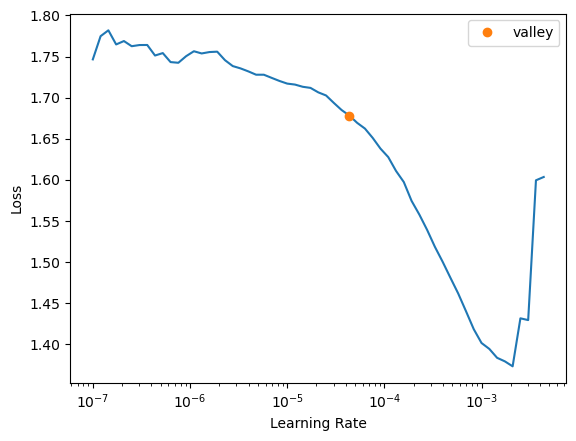

In [23]:
learn.lr_find()

In [24]:
learn.fine_tune(30, 4.365158383734524e-05, freeze_epochs=1)

epoch,train_loss,valid_loss,COCOMetric,time
0,1.685132,1.476732,0.000000,00:10


epoch,train_loss,valid_loss,COCOMetric,time
0,1.511644,1.415580,0.000000,00:10
1,1.482590,1.348980,0.000000,00:10
2,1.441281,1.274133,0.000041,00:10
3,1.395520,1.160504,0.001223,00:10
4,1.332409,0.941683,0.038585,00:10
5,1.212951,0.666158,0.171507,00:10
6,1.096753,0.560969,0.200999,00:10
7,0.983759,0.508924,0.239603,00:10
8,0.884910,0.495596,0.245192,00:10
9,0.808463,0.478436,0.250210,00:10


In [34]:
from icevision.models import *


In [35]:
checkpoint_path = BASE_DIR+'/coco-retinanet-checkpoint-full.pth'

save_icevision_checkpoint(model, 
                        model_name='mmdet.retinanet', 
                        backbone_name='resnet50_fpn_1x',
                        classes =  train_parser.class_map.get_classes(), 
                        img_size=image_size, 
                        filename=checkpoint_path,
                        meta={'icevision_version': '0.9.1'})

In [36]:
#checkpoint_path = 'coco-retinanet-checkpoint-full.pth'
checkpoint_and_model = model_from_checkpoint(checkpoint_path)

load checkpoint from local path: D:/ws/dldata/data/helmet/coco/coco//coco-retinanet-checkpoint-full.pth


2022-03-07 20:36:21,334 - mmcv - INFO - initialize ResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}
2022-03-07 20:36:21,335 - mmcv - INFO - load model from: torchvision://resnet50
2022-03-07 20:36:21,336 - mmcv - INFO - load checkpoint from torchvision path: torchvision://resnet50
2022-03-07 20:36:21,481 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2022-03-07 20:36:21,512 - mmcv - INFO - initialize FPN with init_cfg {'type': 'Xavier', 'layer': 'Conv2d', 'distribution': 'uniform'}
2022-03-07 20:36:21,560 - mmcv - INFO - initialize RetinaHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01, 'override': {'type': 'Normal', 'name': 'retina_cls', 'std': 0.01, 'bias_prob': 0.01}}
2022-03-07 20:36:21,596 - mmcv - INFO - 
backbone.conv1.weight - torch.Size([64, 3, 7, 7]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:36:21,597 - mmcv - INFO

2022-03-07 20:36:21,632 - mmcv - INFO - 
backbone.layer2.1.bn2.bias - torch.Size([128]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:36:21,634 - mmcv - INFO - 
backbone.layer2.1.conv3.weight - torch.Size([512, 128, 1, 1]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:36:21,634 - mmcv - INFO - 
backbone.layer2.1.bn3.weight - torch.Size([512]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:36:21,635 - mmcv - INFO - 
backbone.layer2.1.bn3.bias - torch.Size([512]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:36:21,636 - mmcv - INFO - 
backbone.layer2.2.conv1.weight - torch.Size([128, 512, 1, 1]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:36:21,636 - mmcv - INFO - 
backbone.layer2.2.bn1.weight - torch.Size([128]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:36:21,637 - mmcv - INFO - 
backbone.layer2.2.bn1.bias - torch.Size([128]): 
PretrainedInit: load fro

2022-03-07 20:36:21,673 - mmcv - INFO - 
backbone.layer3.3.bn2.weight - torch.Size([256]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:36:21,674 - mmcv - INFO - 
backbone.layer3.3.bn2.bias - torch.Size([256]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:36:21,675 - mmcv - INFO - 
backbone.layer3.3.conv3.weight - torch.Size([1024, 256, 1, 1]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:36:21,676 - mmcv - INFO - 
backbone.layer3.3.bn3.weight - torch.Size([1024]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:36:21,676 - mmcv - INFO - 
backbone.layer3.3.bn3.bias - torch.Size([1024]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:36:21,677 - mmcv - INFO - 
backbone.layer3.4.conv1.weight - torch.Size([256, 1024, 1, 1]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 20:36:21,677 - mmcv - INFO - 
backbone.layer3.4.bn1.weight - torch.Size([256]): 
PretrainedInit: lo

2022-03-07 20:36:21,712 - mmcv - INFO - 
neck.lateral_convs.1.conv.weight - torch.Size([256, 1024, 1, 1]): 
XavierInit: gain=1, distribution=uniform, bias=0 
 
2022-03-07 20:36:21,712 - mmcv - INFO - 
neck.lateral_convs.1.conv.bias - torch.Size([256]): 
The value is the same before and after calling `init_weights` of RetinaNet  
 
2022-03-07 20:36:21,713 - mmcv - INFO - 
neck.lateral_convs.2.conv.weight - torch.Size([256, 2048, 1, 1]): 
XavierInit: gain=1, distribution=uniform, bias=0 
 
2022-03-07 20:36:21,714 - mmcv - INFO - 
neck.lateral_convs.2.conv.bias - torch.Size([256]): 
The value is the same before and after calling `init_weights` of RetinaNet  
 
2022-03-07 20:36:21,715 - mmcv - INFO - 
neck.fpn_convs.0.conv.weight - torch.Size([256, 256, 3, 3]): 
XavierInit: gain=1, distribution=uniform, bias=0 
 
2022-03-07 20:36:21,717 - mmcv - INFO - 
neck.fpn_convs.0.conv.bias - torch.Size([256]): 
The value is the same before and after calling `init_weights` of RetinaNet  
 
2022-03-07

In [37]:
model_type = checkpoint_and_model["model_type"]
backbone = checkpoint_and_model["backbone"]
class_map = checkpoint_and_model["class_map"]
img_size = checkpoint_and_model["img_size"]
model = checkpoint_and_model["model"]

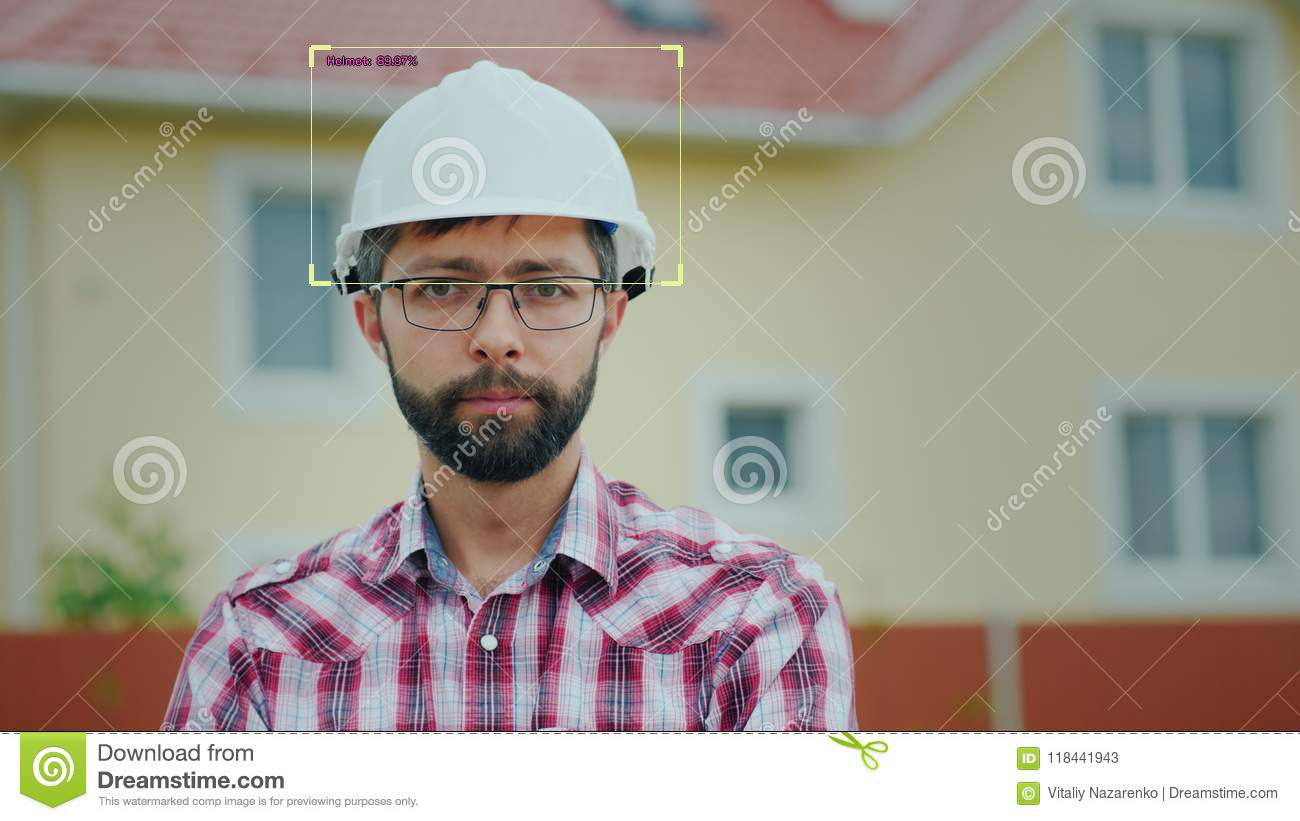

In [38]:
img = BASE_DIR+"test/2.jpg"
pred_dict  = model_type.end2end_detect(img, valid_tfms, model, class_map=class_map, detection_threshold=0.6)
pred_dict['img']

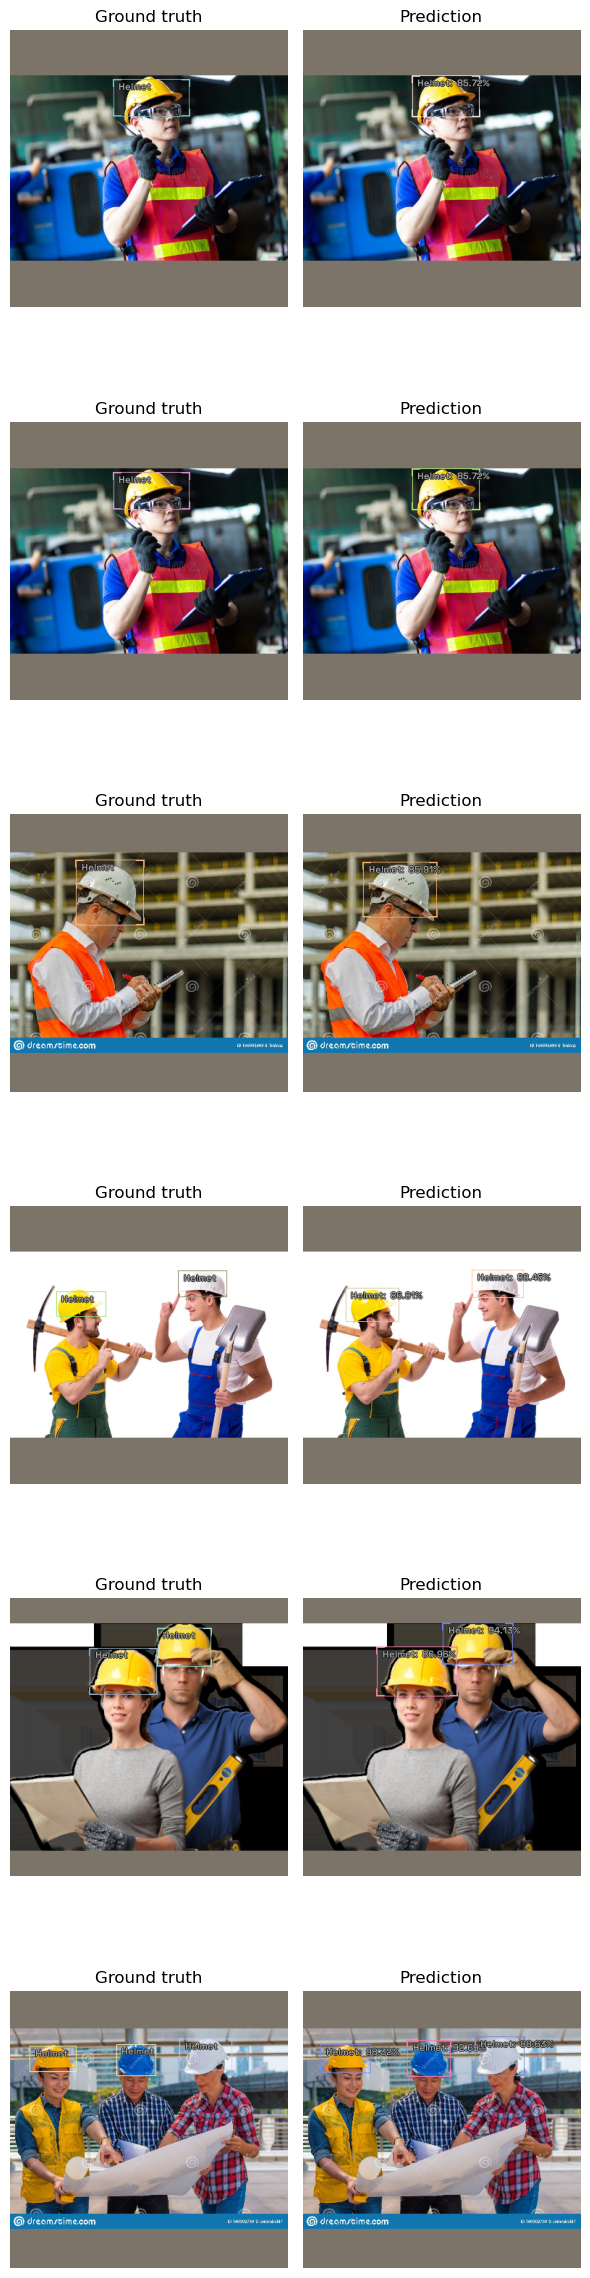

In [39]:
model_type.show_results(model, valid_ds, detection_threshold=.5)
